In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


In [3]:
def read_occurs(fname):
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname + ".txt")
        if f.stat().st_size > 0
    ])
    return rws

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['font.size'] = 15

rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/affected-experiments/output/ae/fbp025q025/")
formats=['.']
fname = "count-groups"

occurs = read_occurs(fname)[0]
x_axis = np.log10(np.maximum(occurs[:, 0], 1))
# print(x_axis)
n_vertices = occurs[:, 1]
plt.plot(x_axis, n_vertices, '.', ms=3)
plt.xticks(rotation=-45)
# plt.legend()
plt.ylim(ymin=1)
plt.xlim(xmin=1)
plt.xlabel("Visits by unique walkers ($10^x$)")
plt.ylabel("Number of vertices")
# plt.legend_.remove()
plt.show

In [5]:
def read_stats(fname):
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname + ".txt")
        if f.stat().st_size > 0
    ])
    return rws

In [7]:
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/datasets/dblp/")
formats=['-.']
fname = "streaming-stats"


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['font.size'] = 12

occurs = read_stats(fname)
x_axis = occurs[:, 0]
print(x_axis)
u_vertices = occurs[:, 1]
u_edges = occurs[:, 2]
n_vertices = occurs[:, 3]
print(u_vertices)
CNV = np.cumsum(n_vertices)
print(CNV)
portion = (u_vertices/CNV)*100

plt.plot(x_axis[:-1], portion[:-1], '-*', ms=8)
plt.xticks(rotation=-45)
# plt.legend()
plt.xlabel("Year")
plt.ylabel("Affected vertices (%)")
# plt.legend_.remove()
plt.ylim(ymin=0)
plt.show

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['font.size'] = 12

occurs = read_stats(fname)[:-1]
x_axis = occurs[:, 0]
print(x_axis)
u_vertices = occurs[:, 1]
u_edges = occurs[:, 2]
n_vertices = occurs[:, 3]
portion = (n_vertices/u_vertices)*100

plt.plot(x_axis, portion, '-*', ms=8)
plt.xticks(rotation=-45)
plt.ylim(ymin=0)
# plt.legend()
plt.xlabel("Year")
plt.ylabel("New vertices(%)")
plt.show

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['font.size'] = 12

occurs = read_stats(fname)
x_axis = occurs[:, 0]
print(x_axis)
u_vertices = occurs[:, 1]
u_edges = occurs[:, 2]
n_vertices = occurs[:, 3]
print(u_vertices)
CNV = np.cumsum(n_vertices)
print(CNV)
portion = ((u_vertices-n_vertices)/CNV)*100

plt.plot(x_axis[:-1], portion[:-1], '-*', ms=8)
plt.xticks(rotation=-45)
# plt.legend()
plt.xlabel("Year")
plt.ylabel("Affected vertices (%)")
# plt.legend_.remove()
plt.ylim(ymin=0)
plt.show

In [1]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['font.size'] = 12

occurs = read_stats(fname)
x_axis = occurs[:, 0]
print(x_axis)
u_vertices = occurs[:, 1]
u_edges = occurs[:, 2]
n_vertices = occurs[:, 3]
print(u_vertices)
CNV = np.cumsum(n_vertices)
CNV = np.log10(np.maximum(CNV, 1))
plt.plot(x_axis[:-1], CNV[:-1], '-*', ms=8)
plt.xticks(rotation=-45)
# plt.legend()
plt.xlabel("Year")
plt.ylabel("|V| ($10^x$)")
# plt.legend_.remove()
plt.ylim(ymin=0)
plt.show

NameError: name 'plt' is not defined

streaming-stats
[1938 1940 1942 1945 1946 1947 1948 1950 1951 1952 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


<function matplotlib.pyplot.show>

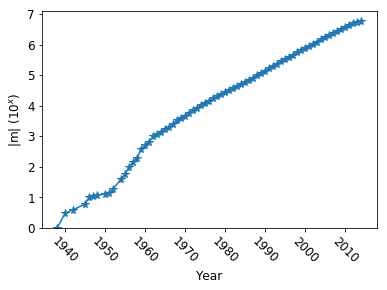

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['font.size'] = 12

occurs = read_stats(fname)
x_axis = occurs[:, 0]
print(x_axis)
u_vertices = occurs[:, 1]
u_edges = occurs[:, 2]
n_vertices = occurs[:, 3]
n_edges = occurs[:, 4]
CNE = np.cumsum(n_edges)
CNE = np.log10(np.maximum(CNE, 1))
plt.plot(x_axis[:-1], CNE[:-1], '-*', ms=8)
plt.xticks(rotation=-45)
# plt.legend()
plt.xlabel("Year")
plt.ylabel("|m| ($10^x$)")
# plt.legend_.remove()
plt.ylim(ymin=0)
plt.show